# Data validation

Sensor data quality plays a vital role in Internet of Things (IoT) applications as they are rendered useless if the data quality is bad.

The second most commonly found error in sensor data is missing data. missing data is caused by various factors such as unstable wireless connection due to network congestion, sensor device outages due to its limited battery life, environmental interferences e.g. human blockage, walls, and weather conditions, and malicious attacks. There are cases where sensor data is missing for extended periods of time, which might lead to incorrect decision making on the consumer side. 


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set()

## Load the PHMDataset2018 dataset

In [3]:
from ceruleo.dataset.catalog.PHMDataset2018 import PHMDataset2018, FailureType

2022-08-04 14:59:19.700199: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/luciano/venvs/ceruleo/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
dataset = PHMDataset2018(
    tools=['01_M01']
)

Processing files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [11:39<00:00, 34.98s/it]


In [5]:
dataset

In [36]:
for d in dataset:
    print(d['FIXTURESHUTTERPOSITION'].isnull().any())

False
True
False
False
False
False
False
False
False
False
False
True
True
True
False
False
False


## Sample rate

In [37]:
from ceruleo.dataset.analysis.sample_rate import sample_rate, sample_rate_summary

(0.0, 10.0)

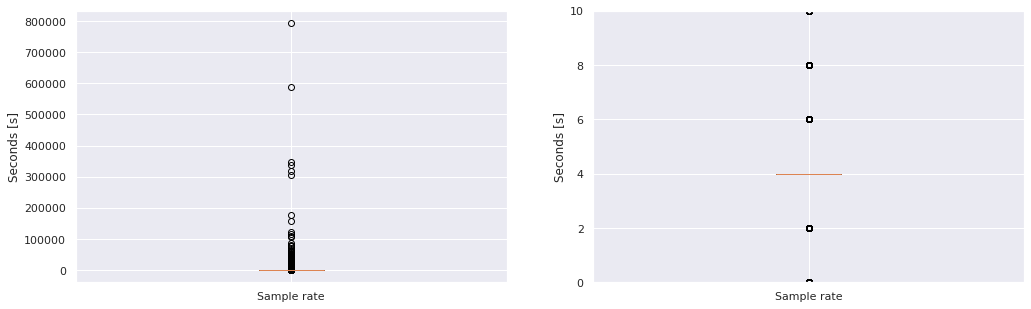

In [38]:
sample_rates = sample_rate(dataset)
fig, ax = plt.subplots(1, 2, figsize=(17, 5))
ax[0].boxplot(sample_rates, labels=['Sample rate'])
ax[0].set_ylabel('Seconds [s]')

ax[1].boxplot(sample_rates, labels=['Sample rate'])
ax[1].set_ylabel('Seconds [s]')
ax[1].set_ylim(0, 10)

In [39]:
sample_rate_summary(dataset)

,Mean sample rate,Std sample rate,Mode sample rate
Dataset,12.639686,784.024257,4.0


### Missing values
Usually, the information of sensors is incomplete and this causes numerous missing values in the features. This library provides some useful functions to analyse the proportion of the missing values for each feature for each life. In some cases, if the feature values are missing in multiple lives, that feature can be discarded.

In [40]:
from ceruleo.dataset.analysis.null import null_proportion
df, null_per_life = null_proportion(dataset)
df

,Feature,Max Null Proportion,Mean Null Proportion,Number of lives with more than 80% missing
11,FIXTURESHUTTERPOSITION,0.000011,1.168679e-06,0
24,recipe_step,0.000007,4.380988e-07,0
0,ACTUALROTATIONANGLE,0.000000,0.000000e+00,0
14,FLOWCOOLPRESSURE,0.000000,0.000000e+00,0
25,runnum,0.000000,0.000000e+00,0
23,recipe,0.000000,0.000000e+00,0
22,fault_number,0.000000,0.000000e+00,0
21,fault_name,0.000000,0.000000e+00,0
20,Tool_y,0.000000,0.000000e+00,0
19,Tool_x,0.000000,0.000000e+00,0


In [11]:
from ceruleo.dataset.analysis.numerical_features import analysis
from ceruleo.transformation.functional.transformers import Transformer
from ceruleo.transformation.features.selection import ByNameFeatureSelector, ByTypeFeatureSelector

ModuleNotFoundError: No module named 'antropy'

In [8]:
transformer = Transformer(
    transformerX=ByTypeFeatureSelector(type_='float'), 
    transformerY=ByNameFeatureSelector(features=['RUL']))

analysis(transformer.fit_map(dataset))

Index(['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION', 'fault_number'],
      dtype='object')


InvalidIndexError: (slice(None, None, None), 0)

## Feature distribution